### Creation of Feed Forward Neural Networks using Python only !
No any other libaries are used here.You gonna see here is -:

1.Creation of a basic neuron with 3 and different inputs 

2.Creation of a simple layer of neurons, with 4 inputs

3.Doing dot product with a layer of neurons and multiple input

4.How to use Activation Function

5.The what and why of the Softmax Activation function with deep learning.

6.To have some measure of how wrong the model is we will use
a loss function. In our case, with a softmax classifier, so I used  categorical cross-entropy.


### Let's design a code of single neuron with 3 inputs example

In [1]:
inputs = [1,2,3]
weights = [0.2, 0.8, -0.5]
bias = 2

output = ( inputs[0]*weights[0]+
         inputs[1]*weights[1]+
         inputs[2]*weights[2] + bias )
print(output)

2.3


What if we have 4 inputs?

In [2]:
inputs = [1,2,3,2.5]
weights = [0.2, 0.8, -0.5,1.0]
bias = 2

output = ( inputs[0]*weights[0]+
         inputs[1]*weights[1]+
         inputs[2]*weights[2]+
         inputs[3]*weights[3]+ bias )
print(output)

4.8


### 3 neuron layer with 4 inputs

In [3]:
inputs = [1,2,3,2.5]
weights0 = [0.2, 0.8, -0.5,1.0]
weights1 = [0.3, 0.4, -0.6,1.0]
weights2 = [0.4, 0.1, -0.5,1.0]

bias0 = 2
bias1 = -1.0
bias2 = 3

output = (inputs[0]*weights0[0]+inputs[1]*weights0[1]+inputs[2]*weights0[2]+inputs[3]*weights0[3]+ bias0,
          inputs[0]*weights1[0]+inputs[1]*weights1[1]+inputs[2]*weights1[2]+inputs[3]*weights1[3]+ bias1,
          inputs[0]*weights2[0]+inputs[1]*weights2[1]+inputs[2]*weights2[2]+inputs[3]*weights2[3]+ bias2
         )
print(output)

(4.8, 0.8000000000000003, 4.6)


In [4]:
inputs = [1,2,3,2.5]
weights = [[0.2, 0.8, -0.5,1.0],
           [0.3, 0.4, -0.6,1.0],
           [0.4, 0.1, -0.5,1.0]]
biases = [2,-1,3]

layer_outputs = []

for neuron_weights,bias in zip(weights,biases):
    output = 0
    
    for input,weight in zip(inputs,neuron_weights):
        output+= input*weight
    
    #add bias
    output+= bias
    
    #add to final
    layer_outputs.append(output)


print(layer_outputs)

[4.8, 0.8000000000000003, 4.6]


### Using the dot product for a neuron's calculation

In [5]:
import numpy as np

inputs = [1,2,3]
weights = [0.2, 0.8, -0.5]
bias = 2

output = np.dot(inputs,weights) + bias
print(output)

2.3


### Using the dot product with a layer of neurons

In [6]:
inputs = [1,2,3,2.5]
weights = [[0.2, 0.8, -0.5,1.0],
           [0.3, 0.4, -0.6,1.0],
           [0.4, 0.1, -0.5,1.0]]
biases = [2,-1,3]

layer_outputs = np.dot(weights,inputs) + bias
print(layer_outputs)

[4.8 3.8 3.6]


### This error is just to show why shapes are important.You can execute the below cells now

In [7]:
inputs = [1,2,3,2.5]
weights = [[0.2, 0.8, -0.5,1.0],
           [0.3, 0.4, -0.6,1.0],
           [0.4, 0.1, -0.5,1.0]]
biases = [2,-1,3]

layer_outputs = np.dot(inputs,weights) + bias
print(layer_outputs)



ValueError: shapes (4,) and (3,4) not aligned: 4 (dim 0) != 3 (dim 0)

In [8]:
inputs = [1,2,3]
weights = [[0.2, 0.8, -0.5],
           [0.3, 0.4, -0.6],
           [0.4, 0.1, -0.5]]
biases = [2,-1,3]

layer_outputs = np.dot(inputs,weights) + bias
print(layer_outputs)

[ 4.   3.9 -1.2]


### Data  often comes in input batch. 

What is a batch? a group of input data at a time. 

Now we need to multiply this group of input data with group of weights both are matrix

In [9]:
a = np.array([1,2,3])
b = np.array([10,11,12])

output = np.dot(a,b)
print(output)

68


### Example of what an array of a batch of samples looks like, compared to a single sample.

In [10]:
import numpy as np

inputs = [[1.0, 2.0, 3.0, 2.5],
          [2.0,5.0,-1.0,2.0],
          [-1/5, 2.7, 3.3, -0.8]]

weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases  = [2.0, 3.0, 0.5]

output = np.dot(inputs, np.array(weights).T) + biases

print(output)

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.67   1.701 -0.312]]


## More hidden layers and non-linear data

A deep neural network is a neural network with 2 or more hidden layers

So for each layer we will have a different set of weights


In [11]:
import numpy as np

inputs = [1, 2, 3]

weights = [[0.2, 0.8, -0.5 ],
           [0.4,0.8,-0.6],
           [0.9, 0.4, 0.8]]

biases = [2.0, -1.0, 0]

weights2 = [[ 0.1, -0.14, 0.5],
            [-0.5, 0.12, -0.33],
            [-0.44, 0.73, -0.13]]

biases2 = [-1,2, -0.5]

layer_output = np.dot(inputs,weights) + biases

print(layer_output)

[5.7 2.6 0.7]


### Matrix product with row and column vectors with a batch of inputs to the neural network

#### Q-1 How many neurons we have in the second layer?

In [12]:
import numpy as np

inputs = [[1.0, 2.0, 3.0, 2.5],
          [2.0,5.0,-1.0,2.0],
          [-1/5, 2.7, 3.3, -0.8]]

weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2.0, -1.0, 0]

weights2 = [[ 0.1, -0.14, 0.5],
            [-0.5, 0.12, -0.33],
            [-0.44, 0.73, -0.13]]

biases2 = [-1,2, -0.5]

layer1_output = np.dot(inputs, np.array(weights).T) + biases

layer2_output = np.dot(layer1_output, np.array(weights2).T) + biases2

print(layer2_output)

[[ 0.8131  -1.35685 -4.89375]
 [ 0.5534  -3.0482  -8.6183 ]
 [-0.91714  1.15708 -2.80751]]


### Extracting the data

In [13]:
!pip install nnfs

In [14]:
import nnfs
nnfs.init()

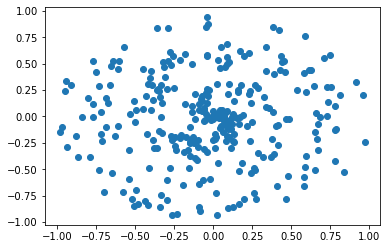

In [15]:
import matplotlib.pyplot as plt
from nnfs.datasets import spiral_data
X,y = spiral_data(samples=100, classes=3)
plt.scatter(X[:,0], X[:,1])
plt.show()

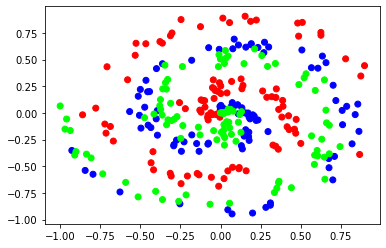

In [16]:
import matplotlib.pyplot as plt
from nnfs.datasets import spiral_data
X,y = spiral_data(samples=100, classes=3)
plt.scatter(X[:,0], X[:,1], c = y, cmap='brg')
plt.show()

### Why & how two or more hidden layers w/ nonlinear activation functions works with neural networks/deep learning

#### Dense layer

In [17]:
import numpy as np 
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()
#Dense Layer
class Layer_Dense:

  def __init__(self, n_inputs, n_neurons):
    #initialize weight and biases
    self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
    self.biases = np.zeros((1,n_neurons))

  # forwards pass
  def forward(self, inputs):
    self.output = np.dot(inputs, self.weights) + self.biases

# test class

X,y = spiral_data(samples = 100, classes=3)

#create the layer
dense1 = Layer_Dense(2, 3)

#perform a forward pass
dense1.forward(X)

# see output
print(dense1.output[:5])

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.0475188e-04  1.1395361e-04 -4.7983500e-05]
 [-2.7414842e-04  3.1729150e-04 -8.6921798e-05]
 [-4.2188365e-04  5.2666257e-04 -5.5912682e-05]
 [-5.7707680e-04  7.1401405e-04 -8.9430439e-05]]


### Activation Functions

Activation function is applied to the output of a neuron, which modifies outputs.

We use activation function because is activation function is non-linear, it allows for neural networks with 2 or more layers to map non-linear functions.

There are generally 2 types of activation functions used in NN. 
One in the hidden layers and 1 in the final output layer. 

How non-linearity comes will see later. Generally there are following types 

1. Step activation function 
2. Linear activation function (Last Layer for regression)
3. Sigmoid activation function
4. Rectified Linear Units 


Refs
----
1. https://towardsdatascience.com/if-rectified-linear-units-are-linear-how-do-they-add-nonlinearity-40247d3e4792



ReLU Activation : simple code 


In [18]:
import numpy as np

inputs = [0,2,-1,3.3,-2.7,1.1,2.2,-100]
output = np.maximum(0, inputs)
print(output)

[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


In [19]:
#Relu Activation Class
class Activation_Relu:
    
    #forward pass
    def forward(self, inputs):
        #calculate max of 0, input values
        self.output = np.maximum(0, inputs)

In [20]:
#example 
import numpy as np 
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()
#Dense Layer
class Layer_Dense:

  def __init__(self, n_inputs, n_neurons):
    #initialize weight and biases
    self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
    self.biases = np.zeros((1,n_neurons))

  # forwards pass
  def forward(self, inputs):
    self.output = np.dot(inputs, self.weights) + self.biases

# test class

X,y = spiral_data(samples = 100, classes=3)

#create the layer
dense1 = Layer_Dense(2, 3)
activation1 = Activation_Relu()

#perform a forward pass
dense1.forward(X)

#perform activation of Relu
activation1.forward(dense1.output)


# see output
print(activation1.output[:5])

[[0.         0.         0.        ]
 [0.         0.00011395 0.        ]
 [0.         0.00031729 0.        ]
 [0.         0.00052666 0.        ]
 [0.         0.00071401 0.        ]]


We can see the values have been clipped to 0. 

### Softmax Activation Function



In [21]:
#Using e^x because this function converts negative values to  positive values
#Min value = 0/ Max value = + infinity as e^x is monotonic funtion

In [22]:
layer_outputs = [4.8, 1.21, 2.385]

# need to do e^x
# e = 2.71828182846

exp_values = np.exp(layer_outputs)
print(exp_values)

[121.51041752   3.35348465  10.85906266]


In [23]:
layer_outputs = [4.8, 1.21, 2.385]

# need to do e^x
# e = 2.71828182846

exp_values = np.exp(layer_outputs)
print(exp_values)

# now normalize them 
norm_values = exp_values / np.sum(exp_values)
print(norm_values)

print("sum of normalized values: ", np.sum(norm_values))

[121.51041752   3.35348465  10.85906266]
[0.89528266 0.02470831 0.08000903]
sum of normalized values:  0.9999999999999999


For batches

In [24]:
layer_outputs = np.array([[4.8, 1.21, 2.385],
                          [8.9, -1.81, 0.2],
                          [1.41, 1.051, 0.026]])

print("sum without axis", np.sum(layer_outputs))

sum without axis 18.172


In [25]:
print("sum with axis = 0 ", np.sum(layer_outputs, axis = 0))

sum with axis = 0  [15.11   0.451  2.611]


In [26]:
print("sum with axis = 1 ", np.sum(layer_outputs, axis = 1))

sum with axis = 1  [8.395 7.29  2.487]


In [27]:
# to simplify to single value per sample, use keep_dims
print("sum with axis = 1 ", np.sum(layer_outputs, axis = 1, keepdims=True))

sum with axis = 1  [[8.395]
 [7.29 ]
 [2.487]]


Softmax Activation Code

In [28]:
class Activation_Softmax:
    
    def forward(self, inputs):
        
        e = np.exp(inputs-np.max(inputs,axis=1,keepdims=True))
        
        #normalize
        probs = e/np.sum(e,axis=1,keepdims=True)
        
        self.output = probs

In [29]:
# To prevend exploding values let's substract the max value from each array to retain the values between (-infinity and 1)

In [30]:
#Softmax Activation
class Activation_Softmax:

  # forward pass 
  def forward(self, inputs):

    exp_values = np.exp(inputs - np.max(inputs, axis = 1, keepdims=True))

    #normalize
    probs = exp_values / np.sum(exp_values, axis = 1, keepdims=True)

    self.output = probs
  

Exponent

In [31]:
np.exp(-100)

3.720075976020836e-44

In [32]:
np.exp(-10)

4.5399929762484854e-05

In [33]:
np.exp(0)

1.0

In [34]:
np.exp(10)

22026.465794806718

In [35]:
np.exp(100)

2.6881171418161356e+43

In [36]:
np.exp(1000)

<ipython-input-36-47a6eab891c2>:1: RuntimeWarning: overflow encountered in exp
  np.exp(1000)


inf

In [37]:
softmax = Activation_Softmax()

input = [[1,2,3]]

softmax.forward(input)
print(softmax.output)

[[0.09003057 0.24472847 0.66524096]]


In [38]:
input = [[-2,-1,0]]

softmax.forward(input)
print(softmax.output)

[[0.09003057 0.24472847 0.66524096]]


In [39]:
input = [[-2,-1,0]]

softmax.forward(input)
print(softmax.output)

[[0.09003057 0.24472847 0.66524096]]


Final Code

In [40]:
#example 
import numpy as np 
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()
#Dense Layer
class Layer_Dense:

  def __init__(self, n_inputs, n_neurons):
    #initialize weight and biases
    self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
    self.biases = np.zeros((1,n_neurons))

  # forwards pass
  def forward(self, inputs):
    self.output = np.dot(inputs, self.weights) + self.biases

# test class

X,y = spiral_data(samples = 100, classes=3)

#create the layer
dense1 = Layer_Dense(2, 3)
activation1 = Activation_Relu()
activation2 = Activation_Softmax()

#perform a forward pass
dense1.forward(X)

#perform activation of Relu
activation1.forward(dense1.output)

#perform softmax
activation2.forward(activation1.output)

# see output
print(activation2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.33332068 0.33335868 0.33332068]
 [0.3332981  0.33340386 0.3332981 ]
 [0.3332748  0.33345038 0.3332748 ]
 [0.333254   0.33349204 0.333254  ]]


Categorical Cross Entropy

1.Log(1) = 0 and to get +ve value of Log we added minus(-) sign because we want log function as positive

2.And we are using Log because Log 1 is 0 and that means 100% where our Loss will be 0 and we have to approach to this value only and here we have achieve the concept of Categorical Cross Entropy


In [41]:


import math
output = [0.7, 0.1 , 0.2]

target = [1, 0, 0 ]


loss = -(math.log(output[0]) * target[0] + 
                 math.log(output[1]) * target[1]+
                 math.log(output[2]) * target[2])

print(loss)

0.35667494393873245


In [42]:
# our numpy solution 
import numpy as np 
np.sum(-1*np.log(np.asarray(output)) * np.asarray(target))

0.35667494393873245

In [43]:
print(math.log(1))
print(math.log(0.95))
print(math.log(0.9))
print(math.log(0.8))
print(math.log(0.2))
print(math.log(0.1))
print(math.log(0.05))
print(math.log(0.01))

0.0
-0.05129329438755058
-0.10536051565782628
-0.2231435513142097
-1.6094379124341003
-2.3025850929940455
-2.995732273553991
-4.605170185988091


Calculating Loss

Softmax output array  is giving out the values which which are representing the corresponding to it's class

In [44]:
import numpy as np
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                   [0.1, 0.5, 0.4],
                   [0.02, 0.9, 0.08]])

class_targets = [0,1,1]

print(softmax_outputs[range(len(softmax_outputs)),class_targets])

[0.7 0.5 0.9]


In [45]:
negLog = -np.log(softmax_outputs[range(len(softmax_outputs)),class_targets])
print(negLog)

avg_loss = np.mean(negLog)

print(avg_loss)

[0.35667494 0.69314718 0.10536052]
0.38506088005216804


### One hot encoded values. 


In [46]:
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                   [0.1, 0.5, 0.4],
                   [0.02, 0.9, 0.08]])

class_targets = np.array([[1, 0, 0],
                          [0,1,0],
                         [0,1,0]])

print(np.sum(softmax_outputs * class_targets, axis = 1))
negLog = -1 * np.log(np.sum(softmax_outputs * class_targets, axis = 1))
avg_loss = np.mean(negLog)
print(avg_loss)

[0.7 0.5 0.9]
0.38506088005216804


Problems with log 

In [47]:
np.log(0)

<ipython-input-47-f6e7c0610b57>:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

In [48]:
-np.log(1.0000001)

-9.999999505838704e-08

add a very small value to the actual values like 1e-7


In [49]:
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                   [0.1, 0.5, 0.4],
                   [0.02, 0.9, 0.08]])

class_targets = np.array([[1, 0, 0],
                          [1,0,0],
                         [0,1,0]])

actual_scores = np.sum(softmax_outputs * class_targets, axis = 1)
print(actual_scores)
actual_scores += 1e-7

[0.7 0.1 0.9]


In [50]:
print(actual_scores)

[0.7000001 0.1000001 0.9000001]


In [51]:
preds = np.array([0, 1, 0.5])
preds += 1e-7

preds = np.clip(preds, 1e-7, 1-1e-7)

print(preds)

-np.log(preds)

[1.000000e-07 9.999999e-01 5.000001e-01]


array([1.61180957e+01, 1.00000005e-07, 6.93146981e-01])

Final Code 

In [52]:
# Common loss class 

class Loss : 

  #calculates data and reg loss given model output and truth values 
  def calculate(self, output, y):

    #calculate sample losses 

    sample_losses = self.forward(output, y )

    #mean loss 
    data_loss = np.mean(sample_losses)

    #return 
    return data_loss 


In [53]:
# Categorical Cross Entropy Loss 

class Loss_CategoricalCrossEntropy(Loss):

  #forward pass 
  def forward(self, y_pred, y_true):

    #number of samples in a batch 
    samples = len(y_pred)

    #clip data to remove log 0 and negative loss 
    y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

    #probs for target values 

    #if categorical labels 
    if len(y_true.shape) == 1:
      confidences = y_pred_clipped[range(samples), y_true]
    
    elif len(y_true.shape) == 2:
      confidences = np.sum(y_pred_clipped * y_true, axis = 1)

    #Losses
    negLog = -np.log(confidences)

    return negLog
    

In [54]:
loss_fucntion = Loss_CategoricalCrossEntropy()
loss = loss_fucntion.calculate(softmax_outputs, class_targets)
print(loss)

0.9215401841968681
